# OpenCV 사용법
## 1. 개요
- 영상 처리와 컴퓨터 비전을 위한 오픈소스 라이브러리
- C, C++, Python 등에서 사용 가능
- 설치: pip install opencv-python

## 2. 이미지 읽어서 살펴보기
#### cv2.imread(file_name, flag)
- 이미지를 읽어 Numpy 객체로 만드는 함수
    1. file_name: 읽고자 하는 이미지 파일
    2. flag: 이미지를 읽는 방법 설정
        * IMREAD_COLOR: 이미지를 Color로 읽고, 투명한 부분은 무시
        * IMREAD_GRAYSCALE: 이미지를 Grayscale로 읽기
        * IMREAD_UNCHANGED: 이미지를 Color로 읽고, 투명한 부분도 읽기(Alpha)
    3. 반환 값: Numpy 객체(행, 열, 색상: 기본 BGR)
- Jupyter Notebook 사용시에는 plt.imread()

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

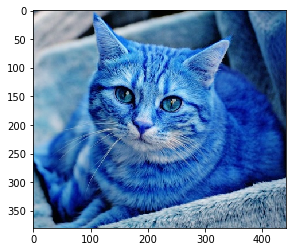

In [7]:
basicImage = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
# cv2.imshow(title, image)
plt.imshow(basicImage)

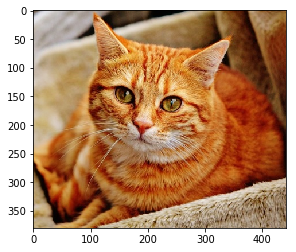

In [8]:
b, g, r = cv2.split(basicImage)   # img파일을 b,g,r로 분리
basicImage = cv2.merge([r,g,b])   # b, r을 바꿔서 Merge
plt.imshow(basicImage)

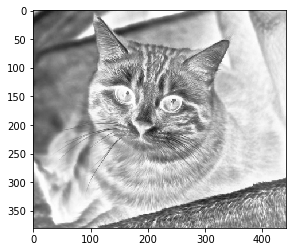

In [20]:
# Gray Scale Image
grayImage = cv2.cvtColor(basicImage, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage, cmap='Greys', vmin=0, vmax=255)

## 3. OpenCV 이미지 연산
#### 픽셀수 및 이미지 크기 확인

In [21]:
image = cv2.imread('images/image_2.png')
print(image.shape)
print(image.size)

(720, 1280, 3)
2764800


#### 특정 범위 픽셀 변경

In [32]:
basicImage = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
import time
start_time = time.time()
for i in range(0, 100):
    for j in range(0, 100):
        basicImage[i, j] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.022001266479492188 seconds ---


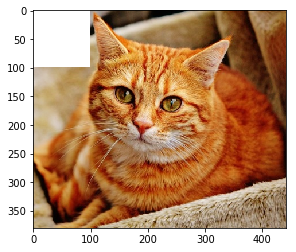

In [33]:
# cv2.imshow('Image', image)
b, g, r = cv2.split(basicImage)   # img파일을 b,g,r로 분리
basicImage = cv2.merge([r,g,b])   # b, r을 바꿔서 Merge
plt.imshow(basicImage)

In [34]:
start_time = time.time()
basicImage[0:100, 0:100] = [0, 0, 0]
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0010001659393310547 seconds ---


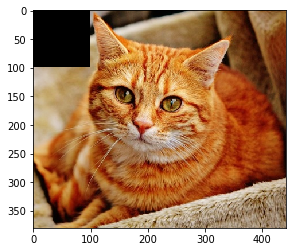

In [35]:
plt.imshow(basicImage)

## 4. OpenCV 이미지 변형
#### 보간법
![title](images/보간법.png)

#### 이미지 크기 조절
#### cv2.resize(image, dsize, fx, fy, interpolation)
- dsize: Manual Size
- fx: 가로 비율
- fy: 세로 비율
- interpolation: 보간법
    * INTER_CUBIC: 사이즈를 크게 할 때 주로 사용
    * INTER_AREA: 사이즈를 작게 할 때 주로 사용

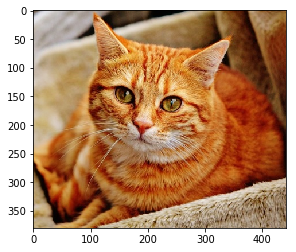

In [40]:
image = cv2.imread('images/cat.jpg')

expand = cv2.resize(image, None, fx=2.0, fy=2.0, 
                    interpolation=cv2.INTER_CUBIC)
# cv2.imshow('Image', expand)
b, g, r = cv2.split(image)   # img파일을 b,g,r로 분리
image = cv2.merge([r,g,b])   # b, r을 바꿔서 Merge
plt.imshow(image)

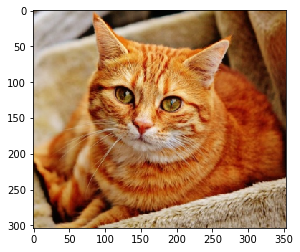

In [41]:
shrink = cv2.resize(image, None, fx=0.8, fy=0.8, 
                    interpolation=cv2.INTER_AREA)
# cv2.imshow('Image', shrink)
plt.imshow(shrink)

#### 이미지 위치 변경
#### cv2.warpAffine(image, M, dsize)
- M: 변환 행렬
- dsize: Manual Size

- 변환 행렬
    * 𝑀11 𝑀12 𝑀13
    * 𝑀21 𝑀22 𝑀23
- 이미지의 모든 좌표 (a, b)는 다음의 좌표로 이동
    * (𝑀11 ∗ 𝑎 + 𝑀12 ∗ 𝑏 + 𝑀13, 𝑀21 ∗ 𝑎 + 𝑀22 ∗ 𝑏 + 𝑀23)
- 단순 이미지 위치 변경
    * 1  0  x위치
    * 0  1  y위치

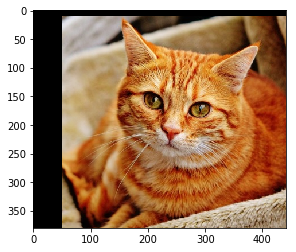

In [42]:
image = cv2.imread('images/cat.jpg')
# 행과 열 정보만 저장
height, width = image.shape[:2]

M = np.float32([[1, 0, 50], [0, 1, 10]])
dst = cv2.warpAffine(image, M, (width, height))
# cv2.imshow('Image', dst)
b, g, r = cv2.split(dst)   # img파일을 b,g,r로 분리
dst = cv2.merge([r,g,b])   # b, r을 바꿔서 Merge
plt.imshow(dst)

#### 이미지 회전
#### cv2.getRotationMatrix2D(center, angle, scale)
- center: 회전 중심
- angle: 회전 각도
- scale: Scale Factor

- 회전 변환을 위한 기본적인 행렬
    * 𝑐𝑜𝑠𝜃 −𝑠𝑖𝑛𝜃
    * 𝑠𝑖𝑛𝜃 𝑐𝑜𝑠𝜃

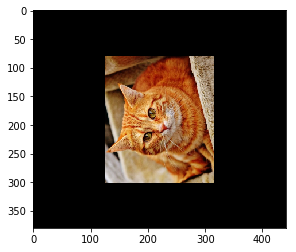

In [43]:
image = cv2.imread('images/cat.jpg')
# 행과 열 정보만 저장
height, width = image.shape[:2]

M = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 0.5)
dst = cv2.warpAffine(image, M, (width, height))
# cv2.imshow('Image', dst)
b, g, r = cv2.split(dst)   # img파일을 b,g,r로 분리
dst = cv2.merge([r,g,b])   # b, r을 바꿔서 Merge
plt.imshow(dst)